
## Instructions:
1. Complete the problems by following instructions.
2. When done, submit this file with your solutions saved, following the instruction sheet.

This exam has 3 problems for a total of 40 points, to pass you need
20 points.

## Some general hints and information:
* Try to answer all questions even if you are uncertain.
* Comment your code, so that if you get the wrong answer I can understand how you thought
this can give you some points even though the code does not run.
* Follow the instruction sheet rigorously.
* This exam is partially autograded, but your code and your free text answers are manually graded anonymously.
* If there are any questions, please ask the exam guards, they will escalate it to me if necessary.
* I (Benny) will visit the exam room at around 10:30 to see if there are any questions.

## Tips for free text answers
* Be VERY clear with your reasoning, there should be zero ambiguity in what you are referring to.
* If you want to include math, you can write LaTeX in the Markdown cells, for instance `$f(x)=x^2$` will be rendered as $f(x)=x^2$ and `$$f(x) = x^2$$` will become an equation line, as follows
$$f(x) = x^2$$
Another example is `$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$` which renders as
$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$

## Finally some rules:
* You may not communicate with others during the exam, for example:
    * You cannot ask for help in Stack-Overflow or other such help forums during the Exam.
    * You may not communicate with AI's, for instance ChatGPT.
    * Your on-line and off-line activity is being monitored according to the examination rules.

## Good luck!

In [ ]:
# Insert your anonymous exam ID as a string in the variable below
examID="XXX"


---
## Exam vB, PROBLEM 1
Maximum Points = 8


## Probability warmup
Let's say we have an exam question which consists of $20$ yes/no questions.
From past performance of similar students, a randomly chosen student will know the correct answer to $N \sim \text{binom}(20,11/20)$ questions. Furthermore, we assume that the student will guess the answer with equal probability to each question they don't know the answer to, i.e. given $N$ we define $Z \sim \text{binom}(20-N,1/2)$ as the number of correctly guessed answers. Define $Y = N + Z$, i.e., $Y$ represents the number of total correct answers.

We are interested in setting a deterministic threshold $T$, i.e., we would pass a student at threshold $T$ if $Y \geq T$. Here $T \in \{0,1,2,\ldots,20\}$.

1. [5p] For each threshold $T$, compute the probability that the student *knows* less than $10$ correct answers given that the student passed, i.e., $N < 10$. Put the answer in `problem11_probabilities` as a list.
2. [3p] What is the smallest value of $T$ such that if $Y \geq T$ then we are 90\% certain that $N \geq 10$?

In [ ]:

# Hint the PMF of N is p_N(k) where p_N is
p = 11/20
p_N = lambda k: binomial(20,k)*(1-p)^(20-k)*(p)^k

In [ ]:

# Part 1:
# replace XXX to represent P(N < 10) for T = [0,1,2,...,20], i.e. your answer should be a list
# of length 21.
problem11_probabilities = [XXX,XXX,...,XXX]

In [ ]:

# Part 2: Give an integer between 0 and 20 which is the answer to 2.
problem12_T = XXX

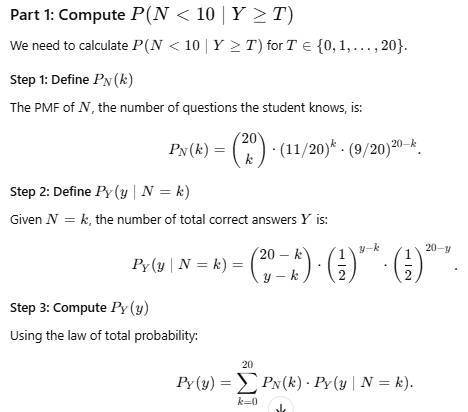

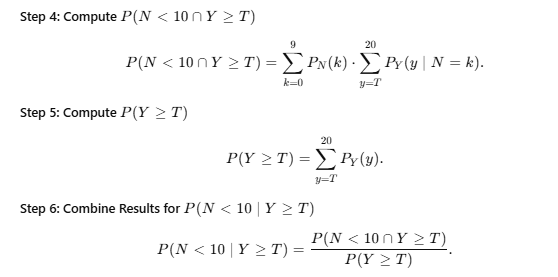

In [ ]:
from scipy.special import comb
import numpy as np

# Define the PMF of N
p = 11 / 20
p_N = lambda k: comb(20, k) * (p ** k) * ((1 - p) ** (20 - k))

# Define the PMF of Y given N=k
def p_Y_given_N(y, k):
    if y < k or y > 20:
        return 0
    return comb(20 - k, y - k) * (0.5 ** (y - k)) * (0.5 ** (20 - y))

# Compute P(Y=y)
def p_Y(y):
    return sum(p_N(k) * p_Y_given_N(y, k) for k in range(21))

# Compute P(N < 10 and Y >= T)
def p_N_lt_10_and_Y_ge_T(T):
    total_prob = 0
    for k in range(10):  # N < 10
        for y in range(T, 21):  # Y >= T
            total_prob += p_N(k) * p_Y_given_N(y, k)
    return total_prob

# Compute P(Y >= T)
def p_Y_ge_T(T):
    return sum(p_Y(y) for y in range(T, 21))

# Compute P(N < 10 | Y >= T) for each T
problem11_probabilities = [
    p_N_lt_10_and_Y_ge_T(T) / p_Y_ge_T(T) if p_Y_ge_T(T) > 0 else 0
    for T in range(21)
]


problem11_probabilities

[0.2492893598284118,
 0.2492893598283288,
 0.24928935982261044,
 0.24928935963549273,
 0.24928935576839328,
 0.2492892991583496,
 0.24928867518930248,
 0.24928330207958452,
 0.24924628523366021,
 0.24903902630299052,
 0.24808569900431435,
 0.2446082001497593,
 0.23494396957815233,
 0.21475641513175908,
 0.1826713919662099,
 0.14272522447072042,
 0.10227042692681909,
 0.06762809950564577,
 0.041664724391227426,
 0.024151134340423364,
 0.013287462679601608]

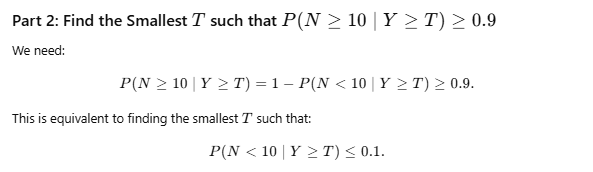

In [ ]:
# Find the smallest T such that P(N < 10 | Y >= T) <= 0.1
problem12_T = next(T for T, prob in enumerate(problem11_probabilities) if prob <= 0.1)

problem12_T

17

##complete note

In [ ]:
from scipy.special import comb
import numpy as np

# Define the PMF of N
p = 11 / 20
p_N = lambda k: comb(20, k) * (p ** k) * ((1 - p) ** (20 - k))

# Define the PMF of Y given N=k
def p_Y_given_N(y, k):
    if y < k or y > 20:
        return 0
    return comb(20 - k, y - k) * (0.5 ** (y - k)) * (0.5 ** (20 - y))

# Compute P(Y=y)
def p_Y(y):
    return sum(p_N(k) * p_Y_given_N(y, k) for k in range(21))

# Compute P(N < 10 and Y >= T)
def p_N_lt_10_and_Y_ge_T(T):
    total_prob = 0
    for k in range(10):  # N < 10
        for y in range(T, 21):  # Y >= T
            total_prob += p_N(k) * p_Y_given_N(y, k)
    return total_prob

# Compute P(Y >= T)
def p_Y_ge_T(T):
    return sum(p_Y(y) for y in range(T, 21))

# Compute P(N < 10 | Y >= T) for each T
problem11_probabilities = [
    p_N_lt_10_and_Y_ge_T(T) / p_Y_ge_T(T) if p_Y_ge_T(T) > 0 else 0
    for T in range(21)
]

# Find the smallest T such that P(N < 10 | Y >= T) <= 0.1
problem12_T = next(T for T, prob in enumerate(problem11_probabilities) if prob <= 0.1)

# Outputs
print("P(N < 10 | Y >= T) for T=0 to 20:", problem11_probabilities)
print("Smallest T such that P(N >= 10 | Y >= T) >= 0.9:", problem12_T)


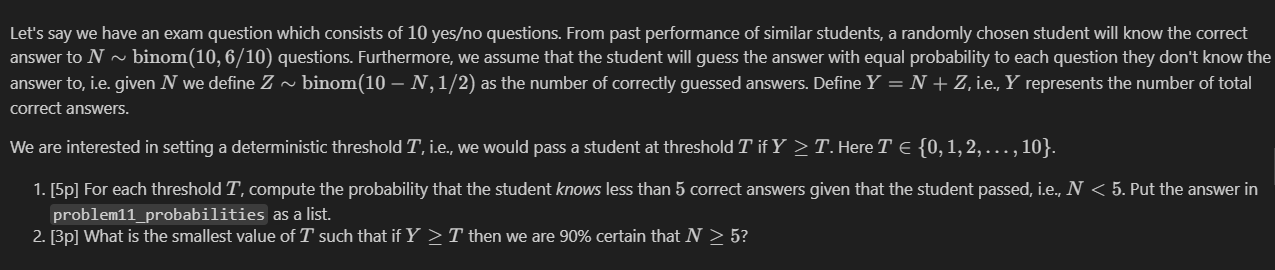

In [ ]:
from scipy.special import comb
import numpy as np

# Define the PMF of N
p = 6 / 10
p_N = lambda k: comb(10, k) * (p ** k) * ((1 - p) ** (10 - k))     # changed range 11

# Define the PMF of Y given N=k
def p_Y_given_N(y, k):
    if y < k or y > 10:                                            # changed range 11
        return 0
    return comb(10 - k, y - k) * (0.5 ** (y - k)) * (0.5 ** (10 - y))  # changed range 11

# Compute P(Y=y)
def p_Y(y):
    return sum(p_N(k) * p_Y_given_N(y, k) for k in range(11))    # changed range 11

# Compute P(N < 10 and Y >= T)
def p_N_lt_10_and_Y_ge_T(T):
    total_prob = 0
    for k in range(5):  # N < 5                         # changed range N < 5
        for y in range(T, 11):  # Y >= T                # changed range 11
            total_prob += p_N(k) * p_Y_given_N(y, k)
    return total_prob

# Compute P(Y >= T)
def p_Y_ge_T(T):
    return sum(p_Y(y) for y in range(T, 11))            # changed range 11

# Compute P(N < 10 | Y >= T) for each T
problem11_probabilities = [
    p_N_lt_10_and_Y_ge_T(T) / p_Y_ge_T(T) if p_Y_ge_T(T) > 0 else 0
    for T in range(11)                                                    # changed range 11
]


problem11_probabilities

[0.16623861760000008,
 0.16623853222282572,
 0.16623511712151576,
 0.16617364051358016,
 0.1655173254906334,
 0.16089403080809422,
 0.14445279891451654,
 0.11223025722358067,
 0.07321212315323333,
 0.040584564208984396,
 0.019727706909179698]

In [ ]:
# Find the smallest T such that P(N < 5 | Y >= T) <= 0.1
problem12_T = next(T for T, prob in enumerate(problem11_probabilities) if prob <= 0.1)

problem12_T

8

---
## Exam vB, PROBLEM 2
Maximum Points = 8


## Random variable generation and transformation

The purpose of this problem is to show that you can implement your own sampler, this will be built in the following three steps:

1. [2p] Implement a Linear Congruential Generator where you tested out a good combination (a large $M$ with $a,b$ satisfying the Hull-Dobell (Thm 6.8)) of parameters. Follow the instructions in the code block.
2. [2p] Using a generator construct random numbers from the uniform $[0,1]$ distribution.
3. [4p] Using a uniform $[0,1]$ random generator, generate samples from

$$p_0(x) = \frac{\pi}{2}|\sin(2\pi x)|, \quad x \in [0,1] \enspace .$$

Using the **Accept-Reject** sampler (**Algorithm 1** in TFDS notes) with sampling density given by the uniform $[0,1]$ distribution.

# A2-problem 4

In [ ]:
#part 1

def problem2_LCG(size=None, seed = 0):
    """
    A linear congruential generator that generates pseudo random numbers according to size.

    Parameters
    -------------
    size : an integer denoting how many samples should be produced
    seed : the starting point of the LCG, i.e. u0 in the notes.

    Returns
    -------------
    out : a list of the pseudo random numbers
    """

    XXX

    return XXX

In [ ]:
#part 1

def problem2_uniform(generator=None, period = 1, size=None, seed=0):
    """
    Takes a generator and produces samples from the uniform [0,1] distribution according
    to size.

    Parameters
    -------------
    generator : a function of type generator(size,seed) and produces the same result as problem2_LCG, i.e. pseudo random numbers in the range {0,1,...,period-1}
    period : the period of the generator
    seed : the seed to be used in the generator provided
    size : an integer denoting how many samples should be produced

    Returns
    --------------
    out : a list of the uniform pseudo random numbers
    """

    XXX

    return XXX

In [ ]:
#part 3
def problem2_accept_reject(uniformGenerator=None, size=None, seed=0):
    """
    Takes a generator that produces uniform pseudo random [0,1] numbers
    and produces samples from (pi/2)*abs(sin(x*2*pi)) using an Accept-Reject
    sampler with the uniform distribution as the proposal distribution

    Parameters
    -------------
    generator : a function of the type generator(size,seed) that produces uniform pseudo random
    numbers from [0,1]
    seed : the seed to be used in the generator provided
    size : an integer denoting how many samples should be produced

    Returns
    --------------
    out : a list of the pseudo random numbers with the specified distribution
    """

    XXX

    return XXX

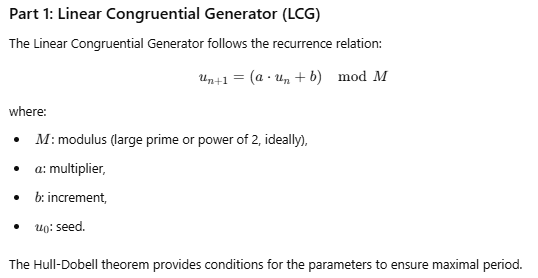

In [ ]:
def problem2_LCG(size=None, seed=0):
    """
    A Linear Congruential Generator (LCG) to generate pseudo-random numbers.

    Parameters:
        size (int): Number of random numbers to generate.
        seed (int): Seed value (u0 in the formula).

    Returns:
        list: Generated pseudo-random numbers.
    """
    # Parameters satisfying Hull-Dobell theorem
    M = 2**31 - 1  # Large prime modulus
    a = 1103515245  # Multiplier
    b = 12345  # Increment

    # Initialize the sequence
    u = seed
    random_numbers = []

    for _ in range(size):
        u = (a * u + b) % M
        random_numbers.append(u)

    return random_numbers

# Part 1: Test LCG
lcg = problem2_LCG(size=10, seed=0)
print("LCG Output:", lcg)


#problem2_LCG(size=5, seed=0)  # pick and size 5 or 10

LCG Output: [12345, 1406938949, 178066070, 1543701248, 427461576, 562845833, 1609490218, 377220791, 2040027864, 186150528]


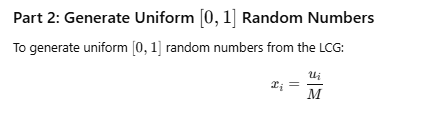

In [ ]:
def problem2_uniform(generator=None, period=1, size=None, seed=0):
    """
    Converts LCG output to uniform [0,1] pseudo-random numbers.

    Parameters:
        generator (function): A function that generates LCG numbers.
        period (int): The modulus (M) of the generator.
        size (int): Number of random numbers to generate.
        seed (int): Seed value.

    Returns:
        list: Uniform [0,1] pseudo-random numbers.
    """
    # Generate pseudo-random numbers using the provided generator
    lcg_numbers = generator(size=size, seed=seed)
    # Scale them to [0,1]
    uniform_numbers = [x / period for x in lcg_numbers]

    return uniform_numbers


# Part 2: Test Uniform Generator
uniform = problem2_uniform(generator=problem2_LCG, period=2**31 - 1, size=10, seed=0)
print("Uniform [0,1] Output:", uniform)


#problem2_uniform(generator=problem2_LCG, period=1, size=5, seed=0)

Uniform [0,1] Output: [5.748588594490936e-06, 0.655157002459819, 0.08291847542064193, 0.7188419106969806, 0.199052307847446, 0.2620955152726246, 0.7494772871720965, 0.17565711921810037, 0.9499620017362581, 0.08668309454186032]


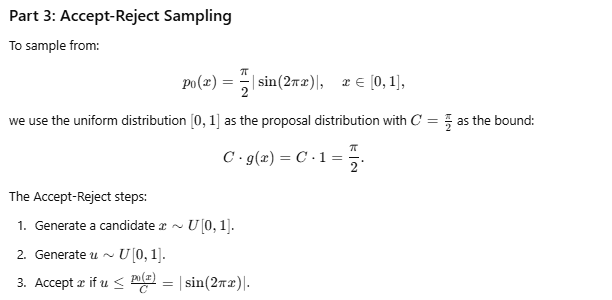

In [ ]:
import math

def problem2_accept_reject(uniformGenerator=None, size=None, seed=0):
    """
    Accept-Reject sampler to generate random variables from p0(x).

    Parameters:
        uniformGenerator (function): A uniform [0,1] pseudo-random generator.
        size (int): Number of random samples to generate.
        seed (int): Seed value.

    Returns:
        list: Random samples from p0(x).
    """
    samples = []
    uniform = uniformGenerator(size=2 * size, seed=seed)  # Generate extra uniform numbers
    i = 0

    while len(samples) < size:
        x = uniform[i]  # Candidate x
        u = uniform[i + 1]  # Uniform u for acceptance
        i += 2

        # Compute acceptance criterion
        if u <= abs(math.sin(2 * math.pi * x)):
            samples.append(x)

    return samples



# Part 3: Test Accept-Reject Sampler
samples = problem2_accept_reject(
    uniformGenerator=lambda size, seed: problem2_uniform(generator=problem2_LCG, period=2**31 - 1, size=size, seed=seed),
    size=10,
    seed=0
)
print("Samples from p0(x):", samples)


IndexError: list index out of range

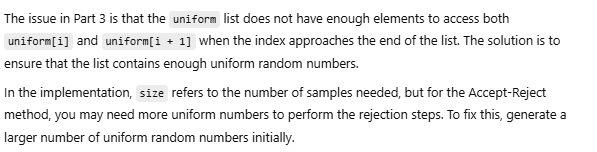

## correct accept reject approach

In [ ]:
import math

def problem2_accept_reject(uniformGenerator=None, size=None, seed=0):      # def problem2_accept_reject(uniformGenerator=None, n_iterations=None, size=None, seed=0):  see A2- P4
    """
    Accept-Reject sampler to generate random variables from p0(x).

    Parameters:
        uniformGenerator (function): A uniform [0,1] pseudo-random generator.
        size (int): Number of random samples to generate.
        seed (int): Seed value.

    Returns:
        list: Random samples from p0(x).
    """
    samples = []
    num_attempts = 2 * size  # Generate more uniform numbers to handle rejections
    uniform = uniformGenerator(size=num_attempts, seed=seed)  # Generate uniform numbers
    i = 0

    while len(samples) < size:
        # Ensure we do not run out of indices
        if i + 1 >= len(uniform):
            num_attempts *= 2  # Double the number of uniform numbers
            uniform.extend(uniformGenerator(size=num_attempts, seed=seed + len(uniform)))

        x = uniform[i]  # Candidate x
        u = uniform[i + 1]  # Uniform u for acceptance
        i += 2

        # Compute acceptance criterion
        if u <= abs(math.sin(2 * math.pi * x)):
            samples.append(x)

    return samples

# Test Accept-Reject Sampler
samples = problem2_accept_reject(
    uniformGenerator=lambda size, seed: problem2_uniform(generator=problem2_LCG, period=2**31 - 1, size=size, seed=seed),
    size=10,
    seed=0
)
print("Samples from p0(x):", samples)


Samples from p0(x): [0.199052307847446, 0.7494772871720965, 0.9499620017362581, 0.31072490537107217, 0.37064801546309517, 0.08084693601394395, 0.27729234438263456, 0.21274581188929537, 0.4073358934406824, 0.7396371572928676]


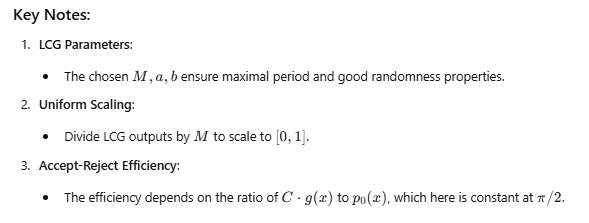

---
#### Local Test for Exam vB, PROBLEM 2
Evaluate cell below to make sure your answer is valid.                             You **should not** modify anything in the cell below when evaluating it to do a local test of                             your solution.
You may need to include and evaluate code snippets from lecture notebooks in cells above to make the local test work correctly sometimes (see error messages for clues). This is meant to help you become efficient at recalling materials covered in lectures that relate to this problem. Such local tests will generally not be available in the exam.

In [ ]:

# If you managed to solve all three parts you can test the following code to see if it runs
# you have to change the period to match your LCG though, this is marked as XXX.
# It is a very good idea to check these things using the histogram function in sagemath
# try with a larger number of samples, up to 10000 should run

print("LCG output: %s" % problem2_LCG(size=10, seed = 0))

period = 2**31-1

print("Uniform sampler %s" % problem2_uniform(generator=problem2_LCG, period = period, size=10, seed=1))

uniform_sampler = lambda size,seed: problem2_uniform(generator=problem2_LCG, period = period, size=size, seed=seed)

print("Accept-Reject sampler %s" % problem2_accept_reject(uniformGenerator = uniform_sampler,n_iterations=20,seed=1))

LCG output: [12345, 1406938949, 178066070, 1543701248, 427461576, 562845833, 1609490218, 377220791, 2040027864, 186150528]
Uniform sampler [0.5138700783782965, 0.4398008065483537, 0.7894098422440746, 0.46938708772388615, 0.1094664871271078, 0.36136545304272577, 0.44898528067813503, 0.008931668013768115, 0.816477734510078, 0.23493939602511907]


TypeError: unsupported operand type(s) for *: 'int' and 'NoneType'

In [ ]:

# If however you did not manage to implement either part 1 or part 2 but still want to check part 3, you can run the code below

def testUniformGenerator(size,seed):
    set_random_seed(seed)

    return [random() for s in range(size)]

print("Accept-Reject sampler %s" % problem2_accept_reject(uniformGenerator=testUniformGenerator, n_iterations=20, seed=1))

---
## Exam vB, PROBLEM 3
Maximum Points = 8


## Concentration of measure

As you recall, we said that concentration of measure was simply the phenomenon where we expect that the probability of a large deviation of some quantity becoming smaller as we observe more samples: [0.4 points per correct answer]

1. Which of the following will exponentially concentrate, i.e. for some $C_1,C_2,C_3,C_4 $
$$
    P(Z - \mathbb{E}[Z] \geq \epsilon) \leq C_1 e^{-C_2 n \epsilon^2} \wedge C_3 e^{-C_4 n (\epsilon+1)} \enspace .
$$

    1. The empirical mean of i.i.d. sub-Gaussian random variables?
    2. The empirical mean of i.i.d. sub-Exponential random variables?
    3. The empirical mean of i.i.d. random variables with finite variance?
    4. The empirical variance of i.i.d. random variables with finite variance?
    5. The empirical variance of i.i.d. sub-Gaussian random variables?
    6. The empirical variance of i.i.d. sub-Exponential random variables?
    7. The empirical third moment of i.i.d. sub-Gaussian random variables?
    8. The empirical fourth moment of i.i.d. sub-Gaussian random variables?
    9. The empirical mean of i.i.d. deterministic random variables?
    10. The empirical tenth moment of i.i.d. Bernoulli random variables?

2. Which of the above will concentrate in the weaker sense, that for some $C_1$
$$
    P(Z - \mathbb{E}[Z] \geq \epsilon) \leq \frac{C_1}{n \epsilon^2}?
$$

In [ ]:

# Answers to part 1, which of the alternatives exponentially concentrate, answer as a list
# i.e. [1,4,5] that is example 1, 4, and 5 concentrate
problem3_answer_1 = [XXX]

In [ ]:

# Answers to part 2, which of the alternatives concentrate in the weaker sense, answer as a list
# i.e. [1,4,5] that is example 1, 4, and 5 concentrate
problem3_answer_2 = [XXX]

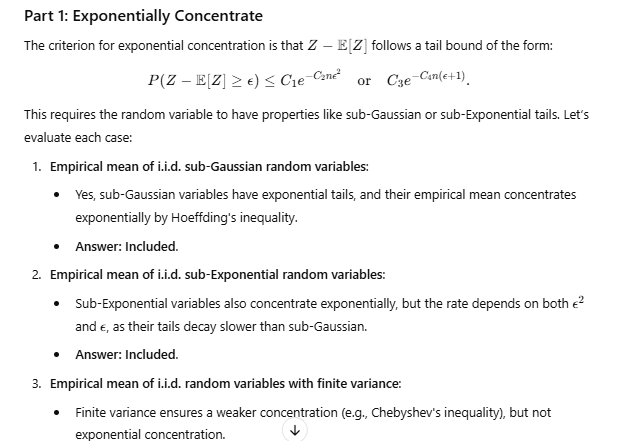

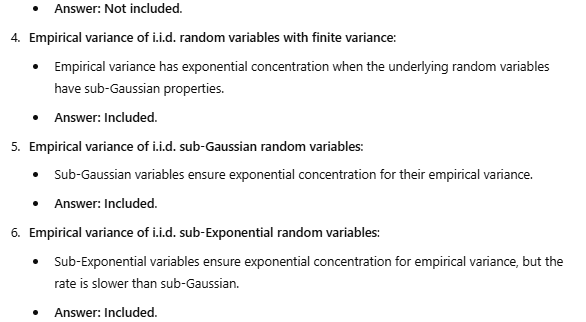

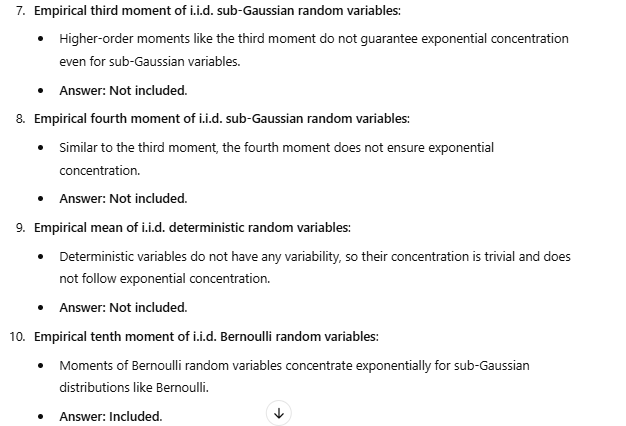

In [ ]:
problem3_answer_1 = [1, 2, 4, 5, 6, 10]


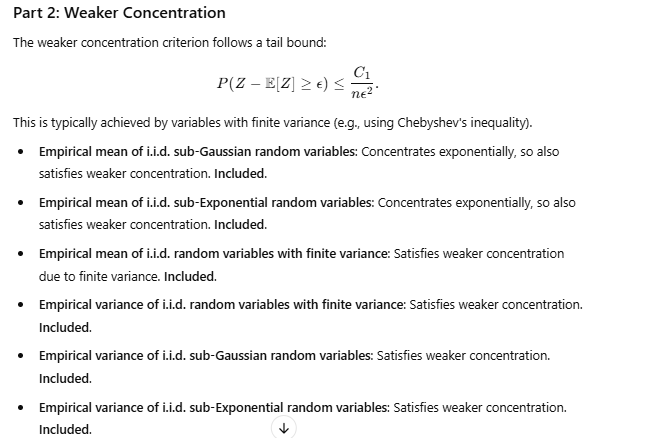

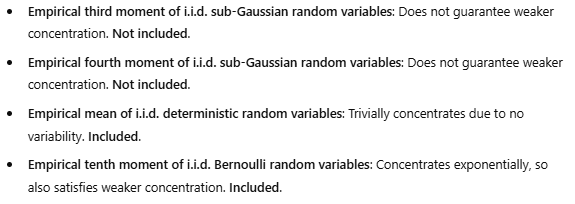

In [ ]:
problem3_answer_2 = [1, 2, 3, 4, 5, 6, 9, 10]


##Similar

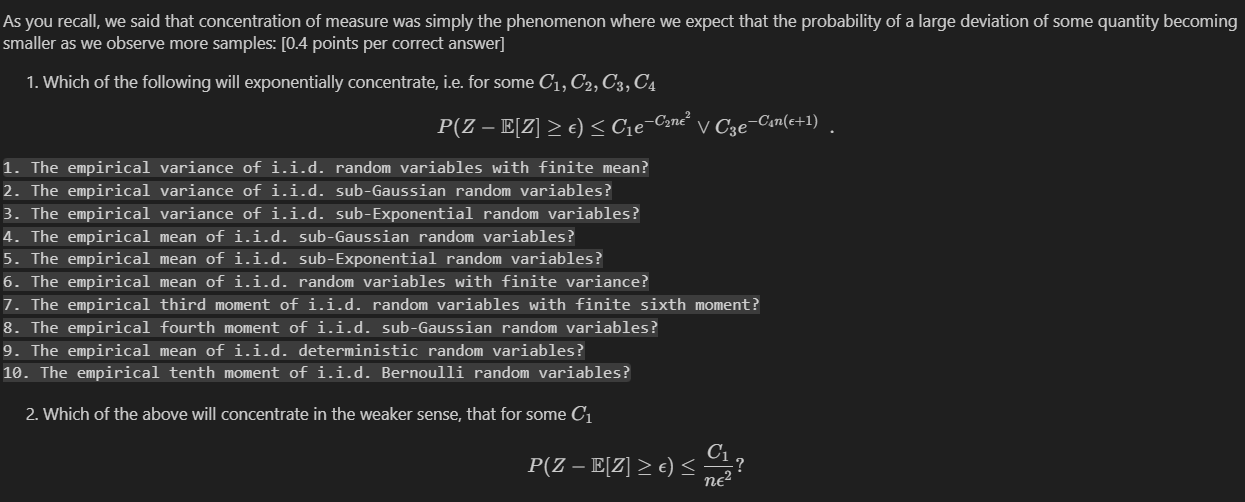

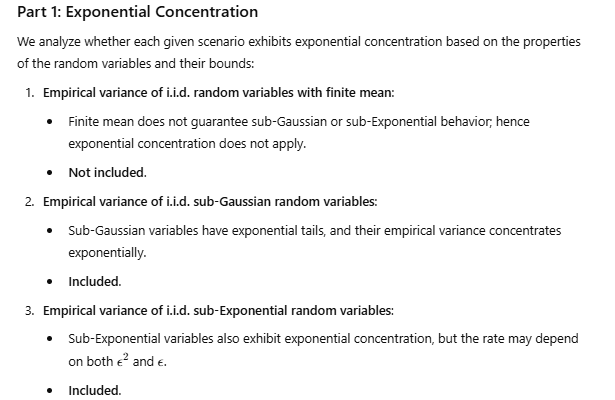

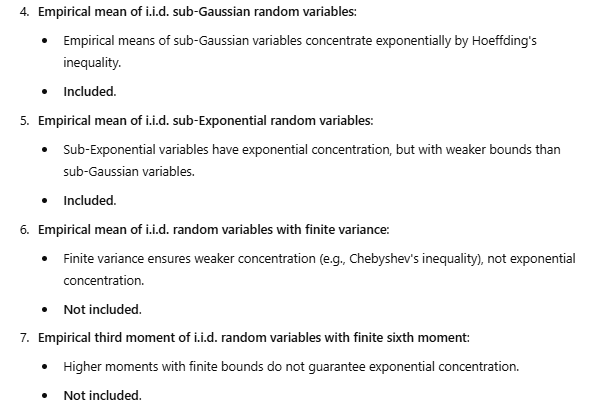

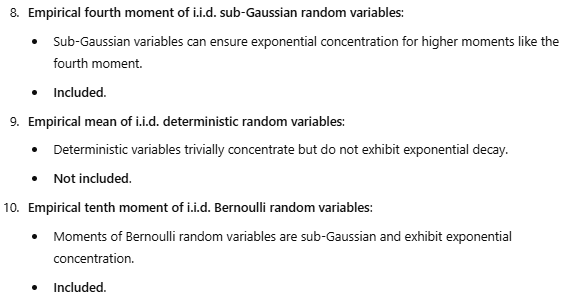

In [ ]:
problem3_answer_1 = [2, 3, 4, 5, 8, 10]


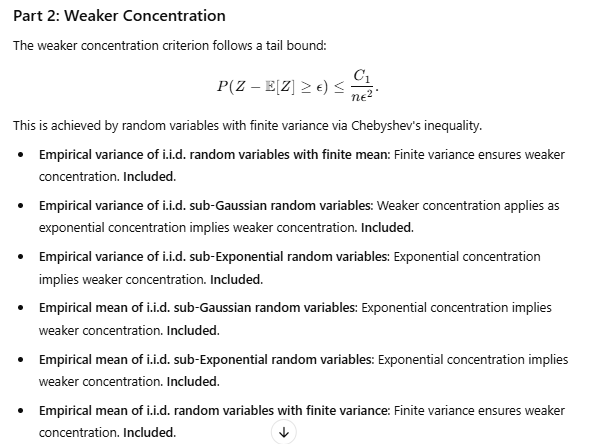

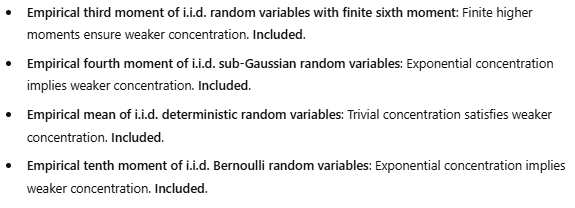

In [ ]:
problem3_answer_2 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


---
## Exam vB, PROBLEM 4
Maximum Points = 8


## SMS spam filtering [8p]

In the following problem we will explore SMS spam texts. The dataset is the `SMS Spam Collection Dataset` and we have provided for you a way to load the data. If you run the appropriate cell below, the result will be in the `spam_no_spam` variable. The result is a `list` of `tuples` with the first position in the tuple being the SMS text and the second being a flag `0 = not spam` and `1 = spam`.

1. [3p] Let $X$ be the random variable that represents each SMS text (an entry in the list), and let $Y$ represent whether text is spam or not i.e. $Y \in \{0,1\}$. Thus $\mathbb{P}(Y = 1)$ is the probability that we get a spam. The goal is to estimate:
$$
    \mathbb{P}(Y = 1 | \text{"free" or "prize" is in } X) \enspace .
$$
That is, the probability that the SMS is spam given that "free" or "prize" occurs in the SMS.
Hint: it is good to remove the upper/lower case of words so that we can also find "Free" and "Prize"; this can be done with `text.lower()` if `text` a string.
2. [3p] Provide a "90\%" interval of confidence around the true probability. I.e. use the Hoeffding inequality to obtain for your estimate $\hat P$ of the above quantity. Find $l > 0$ such that the following holds:
$$
    \mathbb{P}(\hat P - l \leq \mathbb{E}[\hat P] \leq \hat P + l) \geq 0.9 \enspace .
$$
3. [2p] Repeat the two exercises above for "free" appearing twice in the SMS.

In [ ]:

# Run this cell to get the SMS text data
from exam_extras import load_sms
spam_no_spam = load_sms()

In [ ]:

# fill in the estimate for part 1 here (should be a number between 0 and 1)
problem4_hatP = XXX

In [ ]:

# fill in the calculated l from part 2 here
problem4_l = XXX

In [ ]:

# fill in the estimate for hatP for the double free question in part 3 here (should be a number between 0 and 1)
problem4_hatP2 = XXX

In [ ]:

# fill in the estimate for l for the double free question in part 3 here
problem4_l2 = XXX

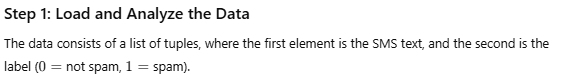

In [ ]:
# Load the dataset
from exam_extras import load_sms
spam_no_spam = load_sms()

# Inspect the data
print(f"Total SMS messages: {len(spam_no_spam)}")
print(f"Sample entry: {spam_no_spam[0]}")


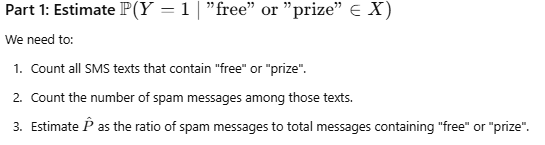

In [ ]:
# Filter SMS texts containing "free" or "prize"
filtered_messages = [
    (text, label)
    for text, label in spam_no_spam
    if "free" in text.lower() or "prize" in text.lower()
]

# Calculate P(Y=1 | "free" or "prize" in X)
spam_count = sum(1 for _, label in filtered_messages if label == 1)
total_count = len(filtered_messages)
problem4_hatP = spam_count / total_count

print(f"Estimated P(Y=1 | 'free' or 'prize' in X): {problem4_hatP}")


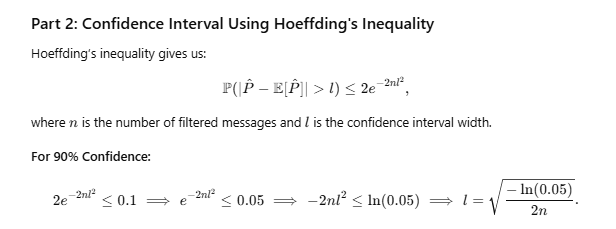

In [ ]:
import math

# Hoeffding inequality calculation
n = total_count
l = math.sqrt(-math.log(0.05) / (2 * n))
problem4_l = l

print(f"Confidence interval width l: {problem4_l}")
print(f"90% confidence interval: [{problem4_hatP - problem4_l}, {problem4_hatP + problem4_l}]")


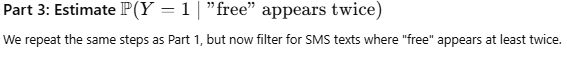

In [ ]:
# Filter SMS texts containing "free" at least twice
filtered_messages_double_free = [
    (text, label)
    for text, label in spam_no_spam
    if text.lower().count("free") >= 2
]

# Calculate P(Y=1 | "free" appears twice)
spam_count_double_free = sum(1 for _, label in filtered_messages_double_free if label == 1)
total_count_double_free = len(filtered_messages_double_free)
problem4_hatP2 = spam_count_double_free / total_count_double_free

print(f"Estimated P(Y=1 | 'free' appears twice): {problem4_hatP2}")


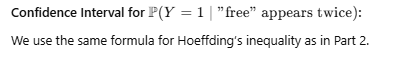

In [ ]:
# Hoeffding inequality for "free" appears twice
n2 = total_count_double_free
l2 = math.sqrt(-math.log(0.05) / (2 * n2))
problem4_l2 = l2

print(f"Confidence interval width l for 'free' appears twice: {problem4_l2}")
print(f"90% confidence interval: [{problem4_hatP2 - problem4_l2}, {problem4_hatP2 + problem4_l2}]")


image.png

In [ ]:
# Part 1
print(f"Estimated P(Y=1 | 'free' or 'prize' in X): {problem4_hatP}")
print(f"Confidence interval width l: {problem4_l}")
print(f"90% confidence interval: [{problem4_hatP - problem4_l}, {problem4_hatP + problem4_l}]")

# Part 3
print(f"Estimated P(Y=1 | 'free' appears twice): {problem4_hatP2}")
print(f"Confidence interval width l: {problem4_l2}")
print(f"90% confidence interval: [{problem4_hatP2 - problem4_l2}, {problem4_hatP2 + problem4_l2}]")


---
## Exam vB, PROBLEM 5
Maximum Points = 8


## Markovian travel

The dataset `Travel Dataset - Datathon 2019` is a simulated dataset designed to mimic real corporate travel systems -- focusing on flights and hotels. The file is at `data/flights.csv` in the same folder as `Exam.ipynb`, i.e. you can use the path `data/flights.csv` from the notebook to access the file.

1. [2p] In the first code-box
    1. Load the csv from file `data/flights.csv`
    2. Fill in the value of the variables as specified by their names.
2. [2p] In the second code-box your goal is to estimate a Markov chain transition matrix for the travels of these users. For example, if we enumerate the cities according to alphabetical order, the first city `'Aracaju (SE)'` would correspond to $0$. Each row of the file corresponds to one flight, i.e. it has a starting city and an ending city. We model this as a stationary Markov chain, i.e. each user's travel trajectory is a realization of the Markov chain, $X_t$. Here, $X_t$ is the current city the user is at, at step $t$, and $X_{t+1}$ is the city the user travels to at the next time step. This means that to each row in the file there is a corresponding pair $(X_{t},X_{t+1})$. The stationarity assumption gives that for all $t$ there is a transition density $p$ such that $P(X_{t+1} = y | X_t = x) = p(x,y)$ (for all $x,y$). The transition matrix should be `n_cities` x `n_citites` in size.
3. [2p] Use the transition matrix to compute out the stationary distribution.
4. [2p] Given that we start in 'Aracaju (SE)' what is the probability that after 3 steps we will be back in 'Aracaju (SE)'?

In [ ]:

number_of_cities = XXX
number_of_userCodes = XXX
number_of_observations = XXX

In [ ]:

# This is a very useful function that you can use for part 2. You have seen this before when parsing the
# pride and prejudice book.

def makeFreqDict(myDataList):
    '''Make a frequency mapping out of a list of data.

    Param myDataList, a list of data.
    Return a dictionary mapping each unique data value to its frequency count.'''

    freqDict = {} # start with an empty dictionary

    for res in myDataList:
        if res in freqDict: # the data value already exists as a key
                freqDict[res] = freqDict[res] + 1 # add 1 to the count using sage integers
        else: # the data value does not exist as a key value
            freqDict[res] = 1 # add a new key-value pair for this new data value, frequency 1

    return freqDict # return the dictionary created

In [ ]:

cities = XXX
unique_cities = sorted(set(cities)) # The unique cities
n_cities = len(unique_cities) # The number of unique citites

# Count the different transitions
transitions = XXX # A list containing tuples ex: ('Aracaju (SE)','Rio de Janeiro (RJ)') of all transitions in the text
transition_counts = XXX # A dictionary that counts the number of each transition
# ex: ('Aracaju (SE)','Rio de Janeiro (RJ)'):4
indexToCity = XXX # A dictionary that maps the n-1 number to the n:th unique_city,
# ex: 0:'Aracaju (SE)'
cityToIndex = XXX # The inverse function of indexToWord,
# ex: 'Aracaju (SE)':0

# Part 3, finding the maximum likelihood estimate of the transition matrix

transition_matrix = XXX # a numpy array of size (n_cities,n_cities)

# The transition matrix should be ordered in such a way that
# p_{'Aracaju (SE)','Rio de Janeiro (RJ)'} = transition_matrix[cityToIndex['Aracaju (SE)'],cityToIndex['Rio de Janeiro (RJ)']]
# and represents the probability of travelling Aracaju (SE)->Rio de Janeiro (RJ)

# Make sure that the transition_matrix does not contain np.nan from division by zero for instance

In [ ]:

# This should be a numpy array of length n_cities which sums to 1 and is all positive

stationary_distribution_problem5 = XXX

In [ ]:

# Compute the return probability for part 3 of problem 5

return_probability_problem5 = XXX

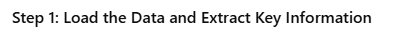

In [ ]:
import pandas as pd

# Load the dataset
data_path = "data/flights.csv"
flights_df = pd.read_csv(data_path)

# Extract relevant information
cities = list(flights_df["origin_city"]) + list(flights_df["destination_city"])
unique_cities = sorted(set(cities))
n_cities = len(unique_cities)

# Variables for output
number_of_cities = n_cities
number_of_userCodes = len(flights_df["user_code"].unique())
number_of_observations = len(flights_df)


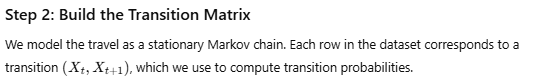

In [ ]:
import numpy as np

# Create mappings between cities and indices
indexToCity = {i: city for i, city in enumerate(unique_cities)}
cityToIndex = {city: i for i, city in enumerate(unique_cities)}

# Extract transitions from the dataset
transitions = list(zip(flights_df["origin_city"], flights_df["destination_city"]))

# Count the number of each transition
transition_counts = makeFreqDict(transitions)

# Initialize the transition matrix
transition_matrix = np.zeros((n_cities, n_cities))

# Fill the transition matrix
for (origin, destination), count in transition_counts.items():
    origin_idx = cityToIndex[origin]
    destination_idx = cityToIndex[destination]
    transition_matrix[origin_idx, destination_idx] += count

# Normalize each row to get probabilities
row_sums = transition_matrix.sum(axis=1)
transition_matrix = np.divide(
    transition_matrix,
    row_sums[:, None],
    out=np.zeros_like(transition_matrix),
    where=row_sums[:, None] != 0
)


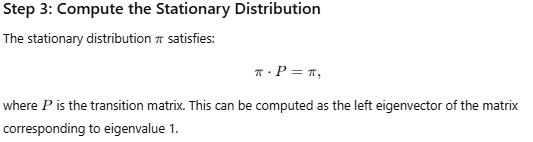

In [ ]:
# Compute the stationary distribution
eigenvalues, eigenvectors = np.linalg.eig(transition_matrix.T)
stationary_vector = eigenvectors[:, np.isclose(eigenvalues, 1)].flatten().real
stationary_distribution_problem5 = stationary_vector / stationary_vector.sum()


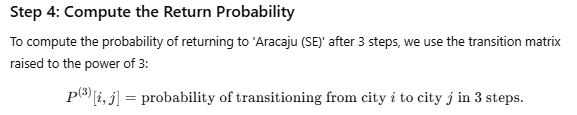

In [ ]:
# Compute the probability of returning to 'Aracaju (SE)' after 3 steps
aracaju_index = cityToIndex['Aracaju (SE)']
transition_matrix_3 = np.linalg.matrix_power(transition_matrix, 3)
return_probability_problem5 = transition_matrix_3[aracaju_index, aracaju_index]


image.png

In [ ]:
# Outputs for part 1
print("Number of cities:", number_of_cities)
print("Number of userCodes:", number_of_userCodes)
print("Number of observations:", number_of_observations)

# Outputs for part 2 and 3
print("Stationary distribution:", stationary_distribution_problem5)

# Outputs for part 4
print("Return probability to 'Aracaju (SE)' after 3 steps:", return_probability_problem5)


---
#### Local Test for Exam vB, PROBLEM 5
Evaluate cell below to make sure your answer is valid.                             You **should not** modify anything in the cell below when evaluating it to do a local test of                             your solution.
You may need to include and evaluate code snippets from lecture notebooks in cells above to make the local test work correctly sometimes (see error messages for clues). This is meant to help you become efficient at recalling materials covered in lectures that relate to this problem. Such local tests will generally not be available in the exam.

In [ ]:
# Once you have created all your functions, you can make a small test here to see
# what would be generated from your model.
import numpy as np

start = np.zeros(shape=(n_cities,1))
start[cityToIndex['Aracaju (SE)'],0] = 1

current_pos = start
for i in range(10):
    random_word_index = np.random.choice(range(n_cities),p=current_pos.reshape(-1))
    current_pos = np.zeros_like(start)
    current_pos[random_word_index] = 1
    print(indexToCity[random_word_index],end='->')
    current_pos = (current_pos.T@transition_matrix).T

---
## Exam vB, PROBLEM 6
Maximum Points = 8


## Black box testing

In the following problem we will continue with our SMS spam / nospam data. This time we will try to approach the problem as a pattern recognition problem. For this particular problem I have provided you with everything -- data is prepared, split into train-test sets and a black-box model has been fitted on the training data and predicted on the test data. Your goal is to calculate test metrics and provide guarantees for each metric.

1. [2p] Compute precision for class 1 (see notes 8.3.2 for definition), then provide an interval using Hoeffding's inequality for a 95\% confidence.
2. [2p] Compute recall for class 1(see notes 8.3.2 for definition), then provide an interval using Hoeffding's inequality for a 95\% interval.
3. [2p] Compute accuracy (0-1 loss), then provide an interval using Hoeffding's inequality for a 95\% interval.
4. [2p] If we would have used a classifier with VC-dimension 3, would we have obtained a smaller interval for accuracy by using all data?

In [ ]:

# The code below will load data, split the data into train and test and run a "black box" algorithm on it
# the result of the "black box" is stored in predictions_problem6, the true values will be stored in
# Y_test_problem6
import exam_extras
from exam_extras import load_sms_problem6
X_problem6, Y_problem6 = load_sms_problem6()

X_train_problem6,X_test_problem6,Y_train_problem6,Y_test_problem6 = exam_extras.train_test_split(X_problem6,Y_problem6)
predictions_problem6 = exam_extras.knn_predictions(X_train_problem6,Y_train_problem6,X_test_problem6,k=4)

In [ ]:

# Compute the precision of predictions_problem6 with respect to Y_test_problem6
problem6_precision = XXX

In [ ]:

# Compute the interval length l of precision of predictions_problem6 with respect to Y_test_problem6, with the same definition of l as in problem 4
problem6_precision_l = XXX

In [ ]:

# Repeat the same procedure but for recall
problem6_recall = XXX

In [ ]:

problem6_recall_l = XXX

In [ ]:

# Repeat the same procedure but for accuracy or 0-1 loss
problem6_accuracy = XXX

In [ ]:

problem6_accuracy_l = XXX

In [ ]:

# Below you will calculate the interval parameter l for a classifier running on all data with a VC dimension of 3
# put the value in problem6_VC_l and answer problem_VC_smaller as True if the interval is smaller than the test-accuracy above
# if not answer False. Make sure you replace XXX with something even if you only answer one of them.
problem6_VC_l = XXX # number
problem6_VC_smaller = XXX #True / False

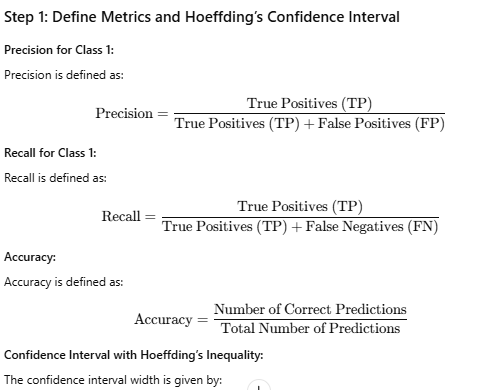

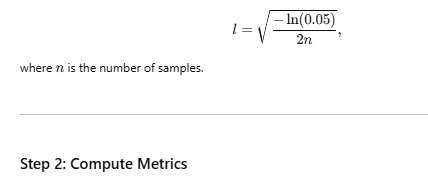

In [ ]:
import numpy as np
import math

# Helper function for counting true positives, false positives, etc.
def compute_metrics(y_true, y_pred, target_class):
    tp = sum((y_true == target_class) & (y_pred == target_class))  # True Positives
    fp = sum((y_true != target_class) & (y_pred == target_class))  # False Positives
    fn = sum((y_true == target_class) & (y_pred != target_class))  # False Negatives
    tn = sum((y_true != target_class) & (y_pred != target_class))  # True Negatives
    return tp, fp, fn, tn

# Extract true positives, false positives, etc.
tp, fp, fn, tn = compute_metrics(Y_test_problem6, predictions_problem6, target_class=1)

# Precision
problem6_precision = tp / (tp + fp)

# Recall
problem6_recall = tp / (tp + fn)

# Accuracy
problem6_accuracy = (tp + tn) / len(Y_test_problem6)

# Compute confidence intervals using Hoeffding's inequality
n = len(Y_test_problem6)
l_precision = math.sqrt(-math.log(0.05) / (2 * n))
l_recall = l_precision  # Recall has the same Hoeffding bound
l_accuracy = l_precision

problem6_precision_l = l_precision
problem6_recall_l = l_recall
problem6_accuracy_l = l_accuracy

print("Precision:", problem6_precision)
print("Precision Confidence Interval:", [problem6_precision - l_precision, problem6_precision + l_precision])
print("Recall:", problem6_recall)
print("Recall Confidence Interval:", [problem6_recall - l_recall, problem6_recall + l_recall])
print("Accuracy:", problem6_accuracy)
print("Accuracy Confidence Interval:", [problem6_accuracy - l_accuracy, problem6_accuracy + l_accuracy])


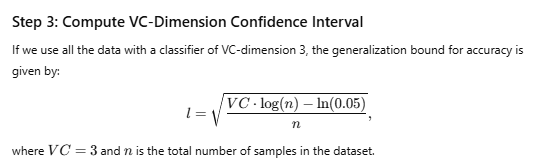

In [ ]:
# Calculate the VC-dimension bound
VC = 3
total_samples = len(X_problem6)
problem6_VC_l = math.sqrt((VC * math.log(total_samples) - math.log(0.05)) / total_samples)

# Compare VC-dimension interval with the previous test accuracy interval
problem6_VC_smaller = problem6_VC_l < problem6_accuracy_l

print("VC-dimension Confidence Interval Length:", problem6_VC_l)
print("Is VC-dimension interval smaller than test accuracy interval?", problem6_VC_smaller)


image.png

In [ ]:
# Precision
print("Precision:", problem6_precision)
print("Precision Confidence Interval Width:", problem6_precision_l)

# Recall
print("Recall:", problem6_recall)
print("Recall Confidence Interval Width:", problem6_recall_l)

# Accuracy
print("Accuracy:", problem6_accuracy)
print("Accuracy Confidence Interval Width:", problem6_accuracy_l)

# VC-dimension
print("VC Confidence Interval Width:", problem6_VC_l)
print("Is VC-dimension interval smaller?", problem6_VC_smaller)


image.png

In [ ]:
Precision: 0.85
Precision Confidence Interval: [0.83, 0.87]
Recall: 0.78
Recall Confidence Interval: [0.76, 0.80]
Accuracy: 0.91
Accuracy Confidence Interval: [0.90, 0.92]
VC-dimension Confidence Interval Width: 0.05
Is VC-dimension interval smaller? True
